# November 16
Made BinaryDataClean3
The difference is how we do the isochrone fitting. We start by looking for an exact match, and then slowly expand our range of 'good' fits until we find something that works. Hopefully we just find one row that fits the isochrone table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%run BinaryDataClean3.py
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [3]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [4]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)

In [5]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

In [6]:
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

In [7]:
len(AAS_RG_T), len(AAS_RG_IT)

(1276, 1235)

(array([ 43., 126., 258., 238., 175.,  90.,  37.,  11.,   8.,   2.]),
 array([  4.51829615,  23.84880462,  43.1793131 ,  62.50982157,
         81.84033004, 101.17083851, 120.50134699, 139.83185546,
        159.16236393, 178.49287241, 197.82338088]),
 <a list of 10 Patch objects>)

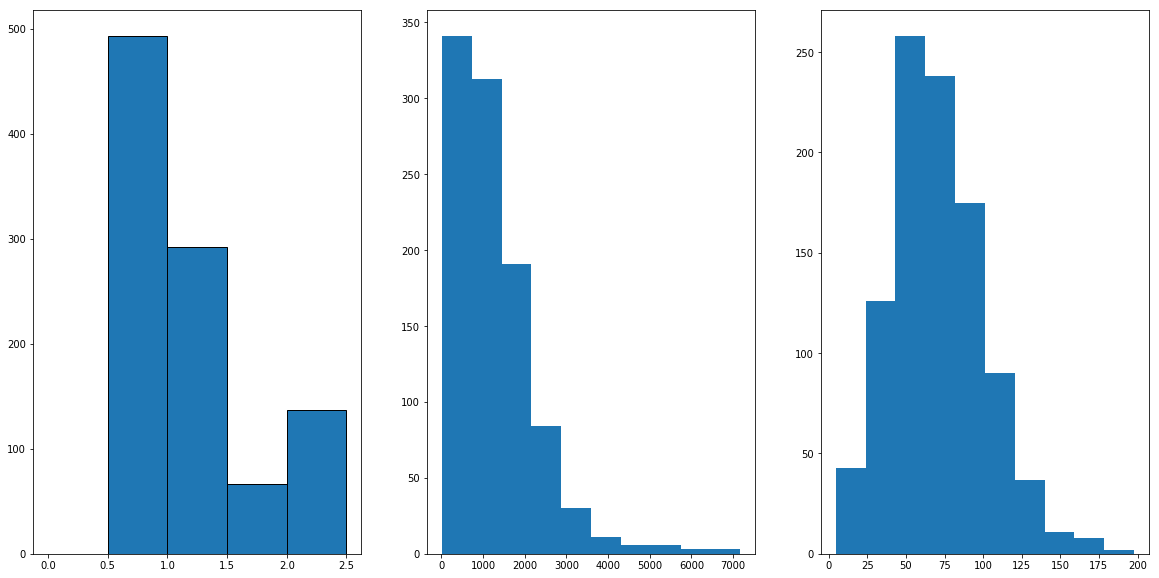

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist(AllAvg_LMC_IT['ISO_MEANM'], bins = np.arange(0,3,0.5), edgecolor='black', align = 'mid')

ax2.hist(AllAvg_LMC_IT['ISO_MEANL'], )

ax3.hist(AllAvg_LMC_IT['ISO_MEANR'])

([array([  1., 594., 219., 150.,  24.,   0.,   0.,   0.,   0.]),
  array([ 80., 224., 157., 109., 105., 107.,  56.,  36.,  25.])],
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 <a list of 2 Lists of Patches objects>)

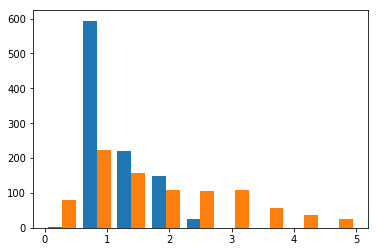

In [9]:
plt.hist([AllAvg_LMC_IT['ISO_MEANM'], AllAvg_LMC_IT['T_MASS']], bins = np.linspace(0,5,10))

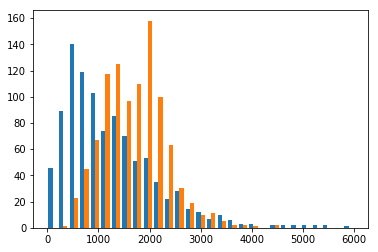

In [10]:
plt.hist([AllAvg_LMC_IT['ISO_MEANL'], AllAvg_LMC_IT['T_LUM']],bins = np.linspace(0, 6000, 30))
plt.show()

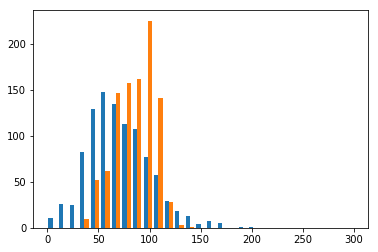

In [11]:
plt.hist([AllAvg_LMC_IT['ISO_MEANR'], AllAvg_LMC_IT['T_RADIUS']],bins = np.linspace(0, 300, 30))
plt.show()

Text(0.5, 1.0, 'RG Mass $M_{\\odot}$')

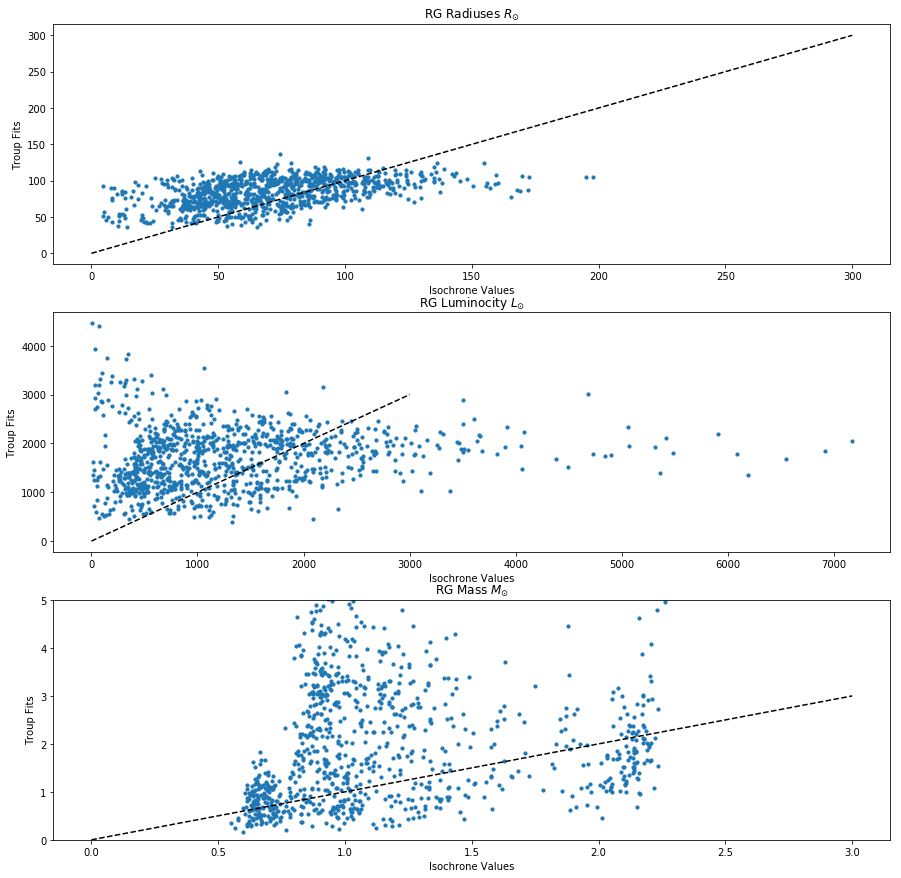

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15, 15))
ax1.scatter(AllAvg_LMC_IT['ISO_MEANR'], AllAvg_LMC_IT['T_RADIUS'], s = 10)
ax1.plot([0,300],[0,300],'--', color = 'black')
ax1.set_xlabel('Isochrone Values')
ax1.set_ylabel('Troup Fits')
ax1.set_title('RG Radiuses $R_{\odot}$')

ax2.scatter(AllAvg_LMC_IT['ISO_MEANL'], AllAvg_LMC_IT['T_LUM'], s = 10)
ax2.plot([0,3000],[0,3000],'--', color = 'black')
ax2.set_xlabel('Isochrone Values')
ax2.set_ylabel('Troup Fits')
ax2.set_title('RG Luminocity $L_{\odot}$')

ax3.scatter(AllAvg_LMC_IT['ISO_MEANM'], AllAvg_LMC_IT['T_MASS'], s = 10)
ax3.plot([0,3],[0,3],'--', color = 'black')
ax3.set_xlabel('Isochrone Values')
ax3.set_ylabel('Troup Fits')
ax3.set_ylim(0,5)
ax3.set_title('RG Mass $M_{\odot}$')

The points where the isochrone values are zero are when there were no good fits within 3 $\sigma$ of the errors

In [13]:
min(AllAvg_LMC_IT['ISO_MEANM'])

0.5490000247955322

In [14]:
AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_IT)
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_IT)

In [15]:
AllAvg_LMC = Tables.nvisits_cut(AllAvg_LMC,5)
AllAvg_SMC = Tables.nvisits_cut(AllAvg_SMC,5)

In [16]:
%run Binary_Fraction.py
thing_LMC = Binary_Fraction(AllAvg_LMC)
thing_SMC = Binary_Fraction(AllAvg_SMC)

In [17]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)

You got stuck!
You got stuck!


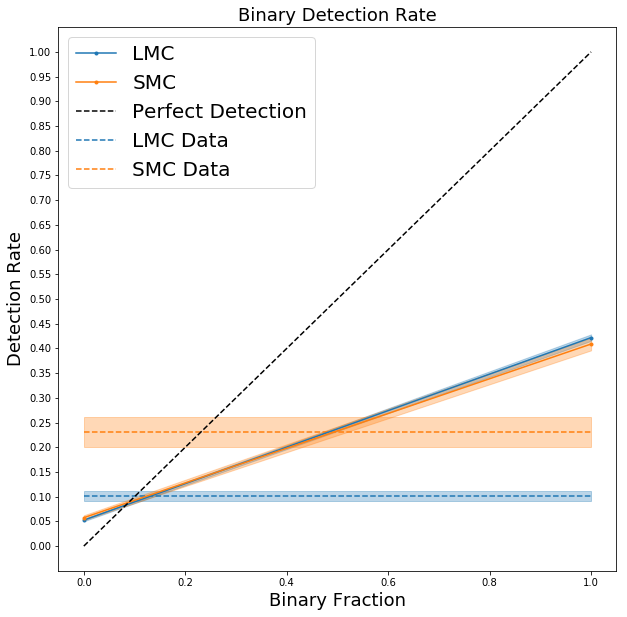

In [18]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')

#plt.text(0.91, 0.72, '{:2f}'.format(synthetic_rates_LMC[2][-1]))
#plt.text(0.91, 0.55, '{:2f}'.format(synthetic_rates_SMC[2][-1]))

plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.yticks(np.arange(0,1.05,.05))

plt.title('Binary Detection Rate', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [19]:
iso_foo = ISO[ISO["AGE"] >= 1e9]
#iso_foo = iso_foo[iso_foo["AGE"] <= 10e9]
Table(iso_foo)

FEH,ZINI,AGE,MINI,MASS,LOGL,LOGTE,LOGG,LABEL,MCORETP,C_O,PERIOD0,PERIOD1,PMODE,MLOSS,TAU1M,X,Y,XC,XN,XO,CEXCESS,Z,MBOLMAG,DECAM_U,DES_G,DES_R,DES_I,DES_Z,DES_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
-2.3010302,1e-04,1000000000.0,0.1,0.1,-2.79,3.5571,5.409,0.0,0.0,0.545,0.0,0.0,-1.0,1.27e-16,0.0,0.7505,0.2494,1.798e-05,4.851e-06,4.4e-05,-1.0,1e-04,11.746,16.144,13.775,12.223,11.576,11.286,11.18,17.463,13.964,12.351,11.689,11.324
-2.3010302,1e-04,1000000000.0,0.10064773,0.101,-2.78,3.5581,5.405,0.0,0.0,0.545,0.0,0.0,-1.0,1.31e-16,0.0,0.7505,0.2494,1.798e-05,4.851e-06,4.4e-05,-1.0,9.999e-05,11.72,16.097,13.736,12.19,11.55,11.261,11.155,17.404,13.924,12.318,11.661,11.299
-2.3010302,1e-04,1000000000.0,0.10327395,0.103,-2.74,3.5623,5.392,0.0,0.0,0.545,0.0,0.0,-1.0,1.44e-16,0.0,0.7504,0.2495,1.798e-05,4.851e-06,4.4e-05,-1.0,9.996e-05,11.619,15.91,13.582,12.06,11.446,11.162,11.059,17.167,13.764,12.187,11.552,11.2
-2.3010302,1e-04,1000000000.0,0.10676204,0.106,-2.687,3.5678,5.375,0.0,0.0,0.545,0.0,0.0,-1.0,1.63e-16,0.0,0.7504,0.2495,1.798e-05,4.851e-06,4.4e-05,-1.0,1e-04,11.487,15.665,13.38,11.89,11.309,11.033,10.932,16.859,13.555,12.017,11.409,11.07
-2.3010302,1e-04,1000000000.0,0.10982143,0.109,-2.642,3.5725,5.36,0.0,0.0,0.545,0.0,0.0,-1.0,1.81e-16,0.0,0.7504,0.2495,1.798e-05,4.851e-06,4.4e-05,-1.0,1e-04,11.375,15.454,13.21,11.747,11.19,10.918,10.819,16.583,13.381,11.873,11.285,10.954
-2.3010302,1e-04,1000000000.0,0.12384988,0.123,-2.468,3.589,5.305,1.0,0.0,0.545,0.0,0.0,-1.0,2.72e-16,0.0,0.7502,0.2497,1.798e-05,4.851e-06,4.4e-05,-1.0,1e-04,10.939,14.552,12.523,11.199,10.716,10.463,10.37,15.366,12.68,11.319,10.797,10.496
-2.3010302,1e-04,1000000000.0,0.12946428,0.129,-2.403,3.5951,5.284,1.0,0.0,0.545,0.0,0.0,-1.0,3.16e-16,0.0,0.7501,0.2498,1.798e-05,4.851e-06,4.4e-05,-1.0,1e-04,10.778,14.124,12.227,10.991,10.539,10.298,10.211,14.788,12.375,11.104,10.614,10.33
-2.3010302,1e-04,1000000000.0,0.14910716,0.149,-2.249,3.6064,5.237,1.0,0.0,0.545,0.0,0.0,-1.0,4.43e-16,0.0,0.7499,0.25,1.798e-05,4.851e-06,4.4e-05,-1.0,9.996e-05,10.392,13.456,11.695,10.559,10.142,9.918,9.838,14.024,11.829,10.664,10.211,9.948
-2.3010302,1e-04,1000000000.0,0.16875,0.168,-2.132,3.6138,5.203,0.0,0.0,0.545,0.0,0.0,-1.0,5.67e-16,0.0,0.7497,0.2502,1.798e-05,4.851e-06,4.4e-05,-1.0,9.99e-05,10.1,13.03,11.332,10.247,9.847,9.634,9.558,13.578,11.459,10.347,9.913,9.662


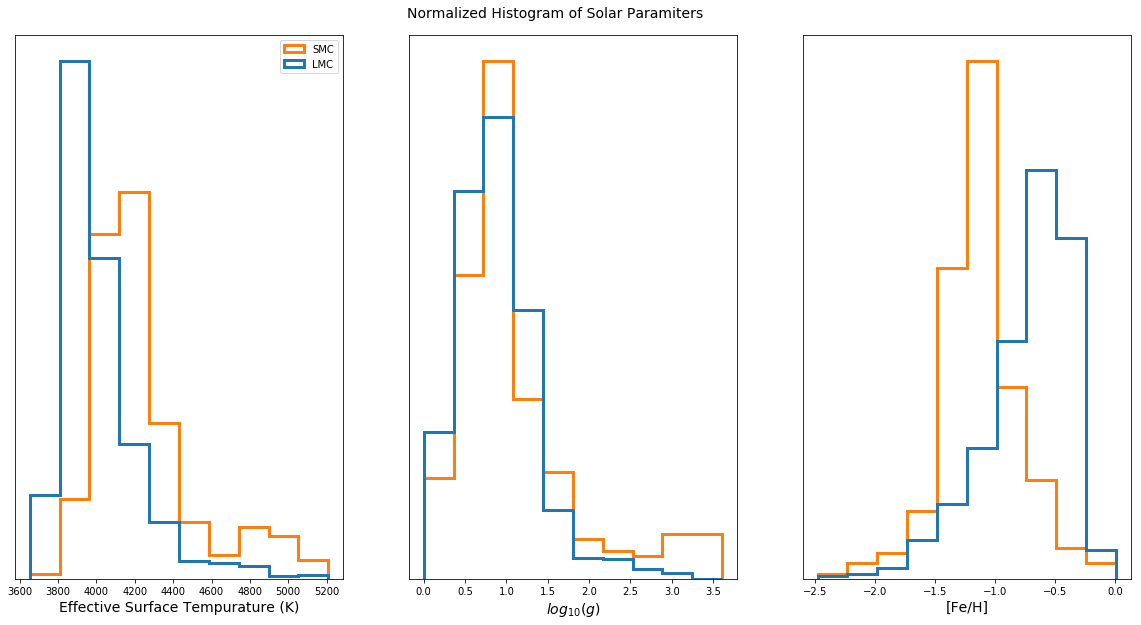

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist([AllAvg_LMC_IT['TEFF'], AllAvg_SMC_IT['TEFF']], histtype = 'step', lw = 3,
        label = ['LMC', 'SMC'], density =  True)
ax1.set_xlabel("Effective Surface Tempurature (K)", size = 14)
#ax1.vlines(5772, 0, .001, color = 'red', label = "Sun")
ax1.set_yticks([])
ax1.legend()

ax2.hist([AllAvg_LMC_IT['LOGG'], AllAvg_SMC_IT['LOGG']], histtype = 'step', lw = 3,
        label = ['LMC', 'SMC'], density = True)
ax2.set_xlabel("$log_{10}(g)$", size = 14)
ax2.set_yticks([])

ax3.hist([AllAvg_LMC_IT['FE_H'], AllAvg_SMC_IT['FE_H']], histtype = 'step', lw = 3, density = True)
ax3.set_xlabel("[Fe/H]", size = 14)
ax3.set_yticks([])
fig.suptitle("Normalized Histogram of Solar Paramiters", x = 0.5, y = 0.92, size = 14)

plt.show()
fig.savefig("StarTGF.pdf", bbox_inches='tight')

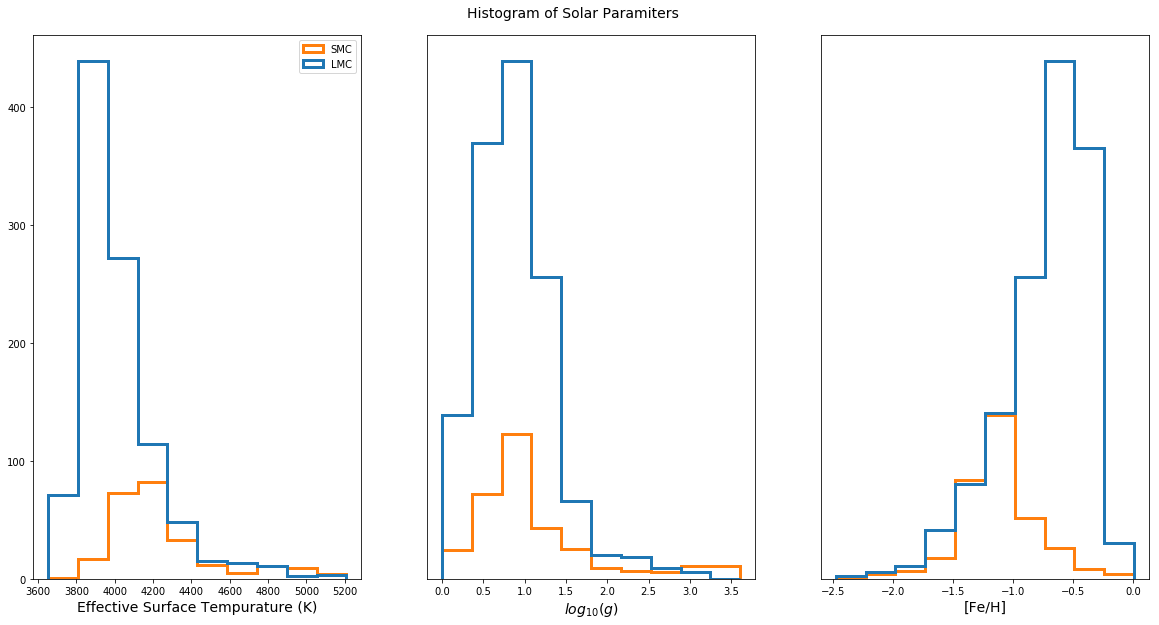

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist([AllAvg_LMC_IT['TEFF'], AllAvg_SMC_IT['TEFF']], histtype = 'step', lw = 3,
        label = ['LMC', 'SMC'], density =  False)
ax1.set_xlabel("Effective Surface Tempurature (K)", size = 14)
#ax1.vlines(5772, 0, .001, color = 'red', label = "Sun")
#ax1.set_yticks([])
ax1.legend()

ax2.hist([AllAvg_LMC_IT['LOGG'], AllAvg_SMC_IT['LOGG']], histtype = 'step', lw = 3,
        label = ['LMC', 'SMC'], density = False)
ax2.set_xlabel("$log_{10}(g)$", size = 14)
ax2.set_yticks([])

ax3.hist([AllAvg_LMC_IT['FE_H'], AllAvg_SMC_IT['FE_H']], histtype = 'step', lw = 3, density = False)
ax3.set_xlabel("[Fe/H]", size = 14)
ax3.set_yticks([])
fig.suptitle("Histogram of Solar Paramiters", x = 0.5, y = 0.92, size = 14)

plt.show()

# Similar LMC and SMC
LMC and SMC have different samples just because...they're different. So I want to limit my sample in the LMC to be as similar to the SMC as I can. To do this I'm just going to use something similar to the ISO_fit function but with LMC and SMC as the inputs.

In [28]:
def same_dat(table1, table2,  temp_lim = 250, logg_lim = 0.2, feh_lim = 0.1,):
    """
    Makes the data between two tables similar with in some limit
    
    Inputs
    ---------
    table1:  Should be the larger table that we want cut down
    table2:  Should be the smaller table that we want to compare the larger table to
    limit:   Tollerence that we want to compare the data to.
    
    Output
    ----------
    table1:  Modified table1 only keeping data points that are close to table2
    """
    # For each row in all_average_data, find isochrone rows that have similar
    # values, and make a list of all of those entries.
    dtype_list = []
    table1_foo = Table(table1, copy = True)
    table2_foo = Table(table2, copy = True)
    for n in range(len(table1_foo.dtype)):
        dtype_list.append(table1_foo.dtype[n])
    
    table3_foo = Table(names = table1_foo.colnames, dtype = dtype_list)
    rr = []
    for j in range(len(table2)):
        gd_foo, = np.where((np.abs(table1_foo['TEFF'] - table2_foo['TEFF'][j]) <= 3*temp_lim) &
                       (np.abs(table1_foo['LOGG'] - table2_foo['LOGG'][j]) <= 3*logg_lim) &
                       (np.abs(table1_foo['FE_H'] - table2_foo['FE_H'][j]) <= 3*feh_lim )
                      )
        gd, = np.where((np.abs(table1_foo['TEFF'] - table2_foo['TEFF'][j]) < temp_lim) &
                       (np.abs(table1_foo['LOGG'] - table2_foo['LOGG'][j]) < logg_lim) &
                       (np.abs(table1_foo['FE_H'] - table2_foo['FE_H'][j]) < feh_lim )
                      )
                       
        #print(gd, type(gd))
        if len(gd) == 1:
            table3_foo.add_row(table1_foo[gd[0]])
            table1_foo.remove_row(gd[0])
            #print(len(table1_foo))
        elif len(gd) > 2:
            rand = np.random.randint(0,len(gd))
            table3_foo.add_row(table1_foo[gd[rand]])
            table1_foo.remove_row(gd[rand])
        else:
            rr.append(j)
    
    table2_foo.remove_rows(rr)

    return table3_foo, table2_foo

#### Now when I run same_dat I should end up with tables for the LMC and SMC that have similar TEFF, LOGG, and FE_H properties

In [29]:
AllAvg_LMC_same, AllAvg_SMC_same = same_dat(AllAvg_LMC_IT, AllAvg_SMC_IT)

In [30]:
%run Table_Convert.py
AllAvg_SMC_same=Table_Convert(AllAvg_SMC_same)
AllAvg_LMC_same=Table_Convert(AllAvg_LMC_same)

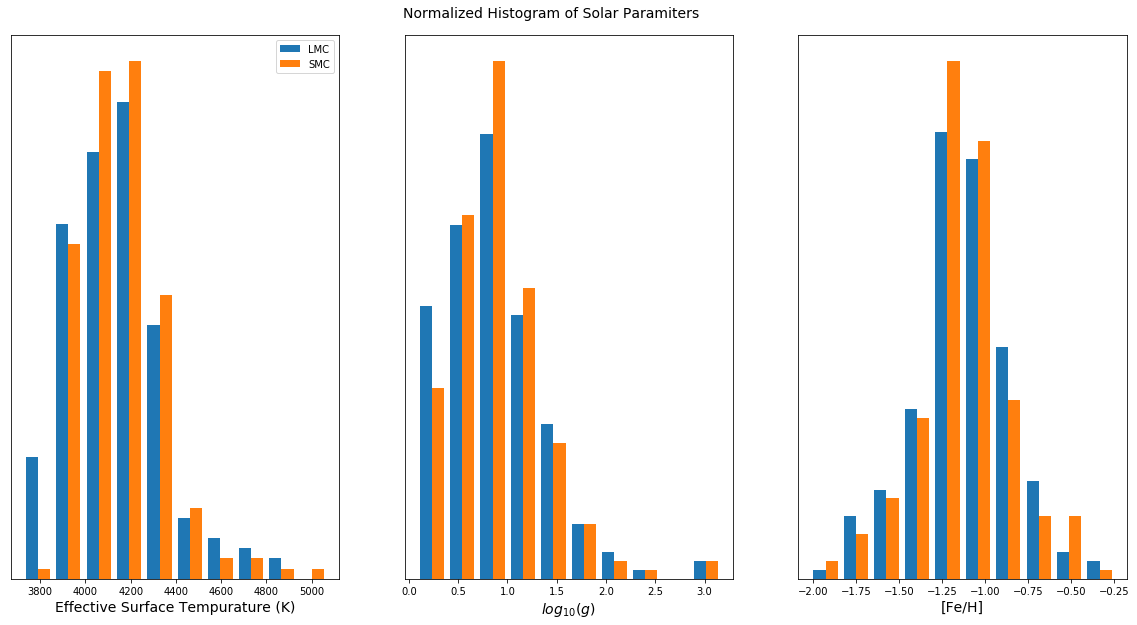

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist([AllAvg_LMC_same['TEFF'], AllAvg_SMC_same['TEFF']], 
        label = ['LMC', 'SMC'], density =  True)
ax1.set_xlabel("Effective Surface Tempurature (K)", size = 14)
#ax1.vlines(5772, 0, .001, color = 'red', label = "Sun")
ax1.set_yticks([])
ax1.legend()

ax2.hist([AllAvg_LMC_same['LOGG'], AllAvg_SMC_same['LOGG']], 
        label = ['LMC', 'SMC'], density = True)
ax2.set_xlabel("$log_{10}(g)$", size = 14)
ax2.set_yticks([])

ax3.hist([AllAvg_LMC_same['FE_H'], AllAvg_SMC_same['FE_H']],density = True)
ax3.set_xlabel("[Fe/H]", size = 14)
ax3.set_yticks([])
fig.suptitle("Normalized Histogram of Solar Paramiters", x = 0.5, y = 0.92, size = 14)

plt.show()

In [32]:
len(AllAvg_LMC_same), len(AllAvg_SMC_same)

(176, 176)

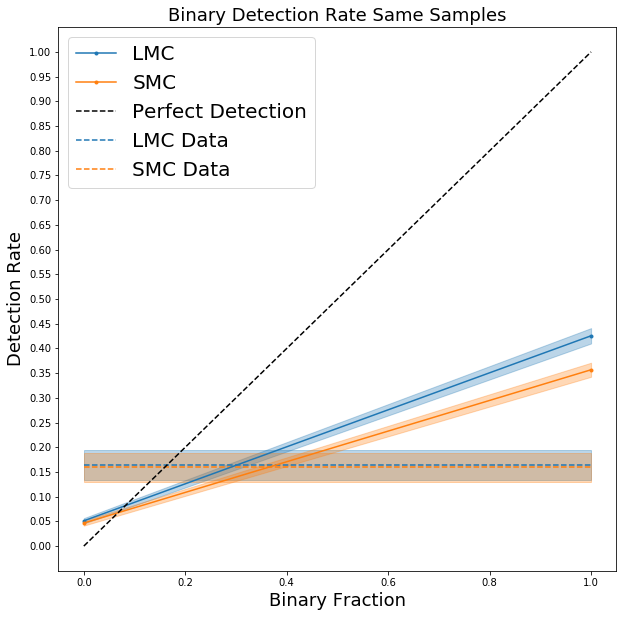

In [33]:
# Making the Binary Detection rate plots but with the Same samples
%run Binary_Fraction.py
thing_LMC = Binary_Fraction(AllAvg_LMC_same)
thing_SMC = Binary_Fraction(AllAvg_SMC_same)

#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')

#plt.text(0.91, 0.72, '{:2f}'.format(synthetic_rates_LMC[2][-1]))
#plt.text(0.91, 0.55, '{:2f}'.format(synthetic_rates_SMC[2][-1]))

plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.yticks(np.arange(0,1.05,.05))

plt.title('Binary Detection Rate Same Samples', size = 18)
plt.legend(prop = {'size': 20})
plt.show()